In [233]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.basemap import Basemap

# Idea to generate a random SNF to compare it to others in the category.
import random

In [2]:
url="https://data.cms.gov/provider-data/api/1/metastore/schemas/dataset/items/4pq5-n9py?show-reference-ids=false"

In [3]:
print(requests.get(url))

<Response [200]>


In [18]:
# print(requests.get(url).json())

In [19]:
response = requests.get(url).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [6]:
response = requests.get(url).json()
print(json.dumps(response["distribution"][0]["data"]["downloadURL"], indent=4, sort_keys=True))

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [7]:
nursinghomedataURL = json.dumps(response["distribution"][0]["data"]['downloadURL'], indent=4, sort_keys=True)
print(nursinghomedataURL)

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [8]:
cleaned_string = nursinghomedataURL.replace('"', ' ').strip()

In [9]:
cleaned_string

'https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv'

In [10]:
# Define the full path to your Resources folder and the desired filename
path = Path("Resources")
filename = "NH_ProviderInfo_Apr2024.csv"

# Combine the path to the Resources folder with the desired filename
file_path = path / filename

# Ensure the directory exists (since it already should), but this will prevent errors
path.mkdir(parents=True, exist_ok=True)

# Download the file
response = requests.get(cleaned_string)
response.raise_for_status()  # Ensure that the download was successful

# Save the file
with open(file_path, 'wb') as file:
    file.write(response.content)

# Print the full file path where the file is saved
print(f"File successfully saved at {file_path}")

File successfully saved at Resources\NH_ProviderInfo_Apr2024.csv


In [11]:
# pd.read_csv(nursinghomedataURL).sample(5)
nursinghomedata=pd.read_csv(cleaned_string)
nursinghomedata.sample(5)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
9335,355091,ASHLEY MEDICAL CENTER NURSING HOME,612 CENTER AVE N,ASHLEY,ND,58413,7012883433,250,Mcintosh,Non profit - Corporation,...,NaN,0,0.00,0,0,"612 CENTER AVE N,ASHLEY,ND,58413",46.0396,-99.372,NaN,2024-04-01
9904,366002,CRESTLINE REHABILITATION AND NURSING CENTER,327 WEST MAIN STREET,CRESTLINE,OH,44827,4196833255,160,Crawford,For profit - Corporation,...,1.0,1,6500.00,0,1,"327 WEST MAIN STREET,CRESTLINE,OH,44827",40.7888,-82.740,NaN,2024-04-01
8397,335257,FORT TRYON CENTER FOR REHABILITATION AND NURSING,801 W 190TH ST,NEW YORK,NY,10040,2125436400,420,New York,For profit - Individual,...,NaN,0,0.00,0,0,"801 W 190TH ST,NEW YORK,NY,10040",40.8568,-73.935,NaN,2024-04-01
12590,495315,CONSULATE HEALTH CARE OF WOODSTOCK,803 SOUTH MAIN ST,WOODSTOCK,VA,22664,5404595676,850,Shenandoah,For profit - Corporation,...,NaN,3,43359.94,0,3,"803 SOUTH MAIN ST,WOODSTOCK,VA,22664",38.8710,-78.515,NaN,2024-04-01
10636,385183,MARQUIS CENTENNIAL POST ACUTE REHAB,725 SE 202ND AVENUE,PORTLAND,OR,97233,5036653118,250,Multnomah,For profit - Corporation,...,0.0,0,0.00,0,0,"725 SE 202ND AVENUE,PORTLAND,OR,97233",45.5174,-122.455,NaN,2024-04-01


In [12]:
# Drop columns that are not needed
nursinghomedataREDUCED=nursinghomedata.drop(columns=['Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating',
                                                    'Short-Stay QM Rating',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating Footnote',
                                                    'Number of administrators who have left the nursing home',
                                                    'Average Number of Residents per Day Footnote',
                                                    'Provider Type',
                                                    'Number of Citations from Infection Control Inspections',
                                                    'Provider Resides in Hospital',
                                                    'Special Focus Status',
                                                    'Automatic Sprinkler Systems in All Required Areas',
                                                    'Overall Rating Footnote',
                                                    'Health Inspection Rating Footnote',
                                                    'QM Rating Footnote',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Geocoding Footnote',
                                                    'Processing Date',
                                                    'Provider SSA County Code',
                                                    'Staffing Rating Footnote',
                                                    'Reported Staffing Footnote',
                                                    'Physical Therapist Staffing Footnote',
                                                    'Total nursing staff turnover footnote',
                                                    'Registered Nurse turnover footnote',
                                                    'Administrator turnover footnote',
                                                    'Telephone Number',
                                                    'ZIP Code',
                                                    'County/Parish',
                                                    'Legal Business Name',
                                                    'Continuing Care Retirement Community',
                                                    'Abuse Icon',
                                                    'Affiliated Entity Name', 
                                                    'Affiliated Entity ID',
                                                    'Provider Changed Ownership in Last 12 Months',
                                                    'Most Recent Health Inspection More Than 2 Years Ago',
                                                    'Provider Resides in Hospital',
                                                    'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
                                                    'Case-Mix LPN Staffing Hours per Resident per Day',
                                                    'Case-Mix RN Staffing Hours per Resident per Day',
                                                    'Case-Mix Total Nurse Staffing Hours per Resident per Day',
                                                    'Provider Address',
                                                    'City/Town',
                                                    'Date First Approved to Provide Medicare and Medicaid Services',
                                                    'Provider Name',
                                                    'With a Resident and Family Council',
                                             ])   

# nursinghomedataREDUCED.sample(25)

In [13]:
# nursinghomedataREDUCED.columns

In [20]:
# Getting Specific Data Columns for XX State
HawaiiData = nursinghomedataREDUCED.loc[nursinghomedata['State'] == ("HI")]
# HawaiiData

In [15]:
# Removing off states, like Guam
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedataREDUCED[~nursinghomedataREDUCED['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

In [16]:
sortedNHD= statetrimedNHD.groupby("State")
sortedNHD.head()

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
0,015009,AL,For profit - Corporation,57,51.2,2.0,2.0,4.0,3.0,2.54923,...,31.333,2,0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736
1,015010,AL,For profit - Corporation,85,80.4,4.0,4.0,3.0,3.0,2.59139,...,6.667,0,0,0,0.00,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254
2,015012,AL,Government - County,50,40.5,4.0,4.0,2.0,4.0,3.50215,...,13.333,0,0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047
3,015014,AL,For profit - Individual,92,75.9,3.0,3.0,4.0,2.0,1.85428,...,20.667,0,0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722
4,015015,AL,For profit - Individual,103,85.5,2.0,2.0,3.0,4.0,2.21479,...,26.667,0,1,1,975.00,0,1,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,535013,WY,For profit - Limited Liability company,146,87.6,1.0,2.0,3.0,1.0,1.67909,...,55.333,0,11,4,26048.75,0,4,"3128 BOXELDER DRIVE,CHEYENNE,WY,82001",41.1391,-104.777
13353,535017,WY,Non profit - Corporation,50,36.9,5.0,4.0,5.0,4.0,2.23379,...,22.667,2,0,2,4565.60,0,2,"333 N BRIDGER AVE,PINEDALE,WY,82941",42.8697,-109.857
13354,535021,WY,Government - State,90,81.3,3.0,3.0,2.0,4.0,2.65335,...,27.333,1,0,1,7442.50,0,1,"890 US HWY 20 SOUTH,BASIN,WY,82410",44.3602,-108.039
13355,535022,WY,Government - Hospital district,160,105.8,2.0,2.0,3.0,4.0,2.93497,...,44.000,0,10,0,0.00,0,0,"1000 S DOUGLAS HWY,GILLETTE,WY,82716",44.2834,-105.494


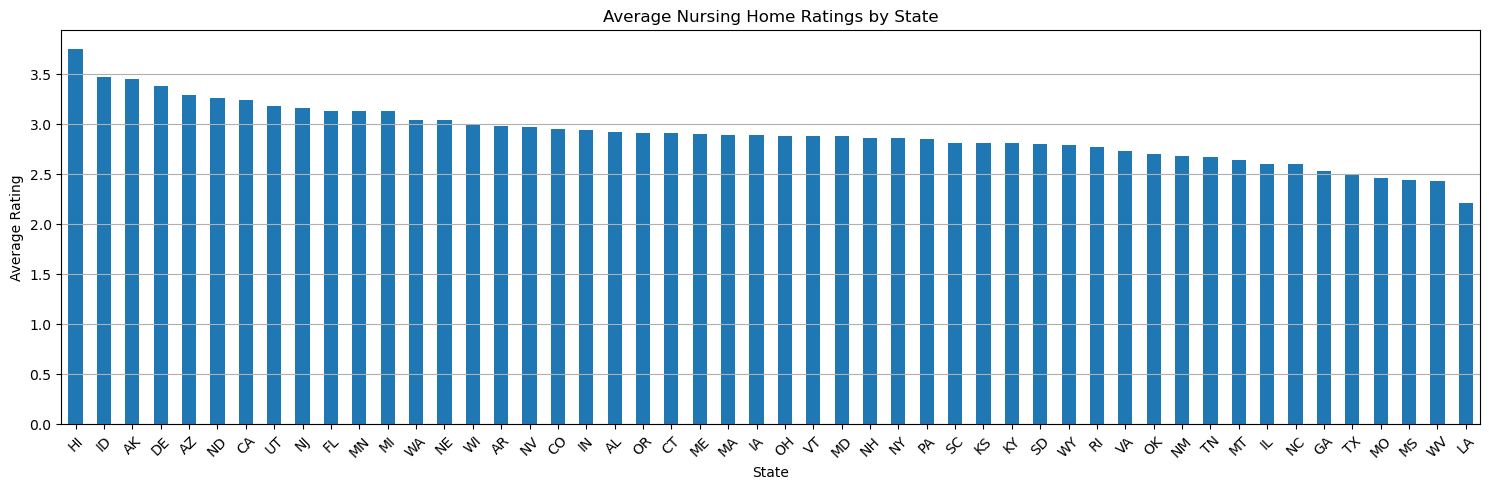

Bar chart successfully saved to Images\State_Ratings_Mean.png


In [17]:

# Define the path for saving the image
images_folder = Path("Images")
images_folder.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
save_path = images_folder / "State_Ratings_Mean.png"

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data on the axes object
state_ratings_mean.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Average Rating')
ax.set_title('Average Nursing Home Ratings by State')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the figure using the fig object directly
fig.savefig(save_path)

# Display the plot
plt.show()

print(f"Bar chart successfully saved to {save_path}")

In [72]:
available_styles = plt.style.available

print("Available Matplotlib styles:")
for style in available_styles:
    print(style)

Available Matplotlib styles:
Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


In [54]:
popfile_path = Path("Resources/StatePopulation.csv")
statepopulationDATA=pd.read_csv(popfile_path)
statepopulationDATA_sorted = statepopulationDATA.sort_values(by='State')
statepopulationDATA_sorted.sample(5)

,State,STATE NAME,Number of Facilities,State Population,"Facilities per 10,000 people"
46,ND,North Dakota,75,"783,926",10
30,IA,Iowa,405,"3,207,004",8
7,GA,Georgia,357,"11,029,227",31
22,SC,South Carolina,189,"5,373,555",28
14,TN,Tennessee,306,"7,126,489",23


In [51]:
nursinghomedata_usstates = nursinghomedata[~nursinghomedata['State'].isin(['GU', 'PR'])]

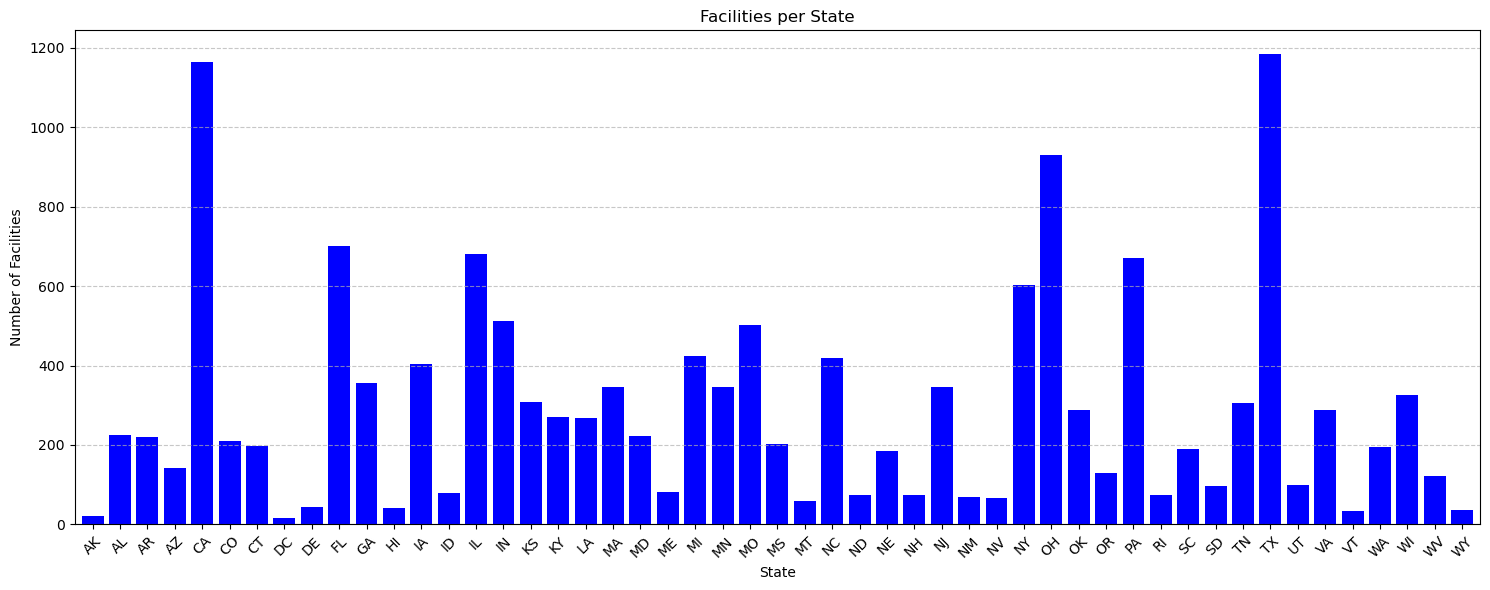

In [60]:
facilityperstate = nursinghomedata_usstates.groupby("State")["Provider Name"].count()

plt.figure(figsize=(15, 6))
facilityperstate.plot(kind='bar', color=['blue'], width=0.8)  
plt.title('Facilities per State')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

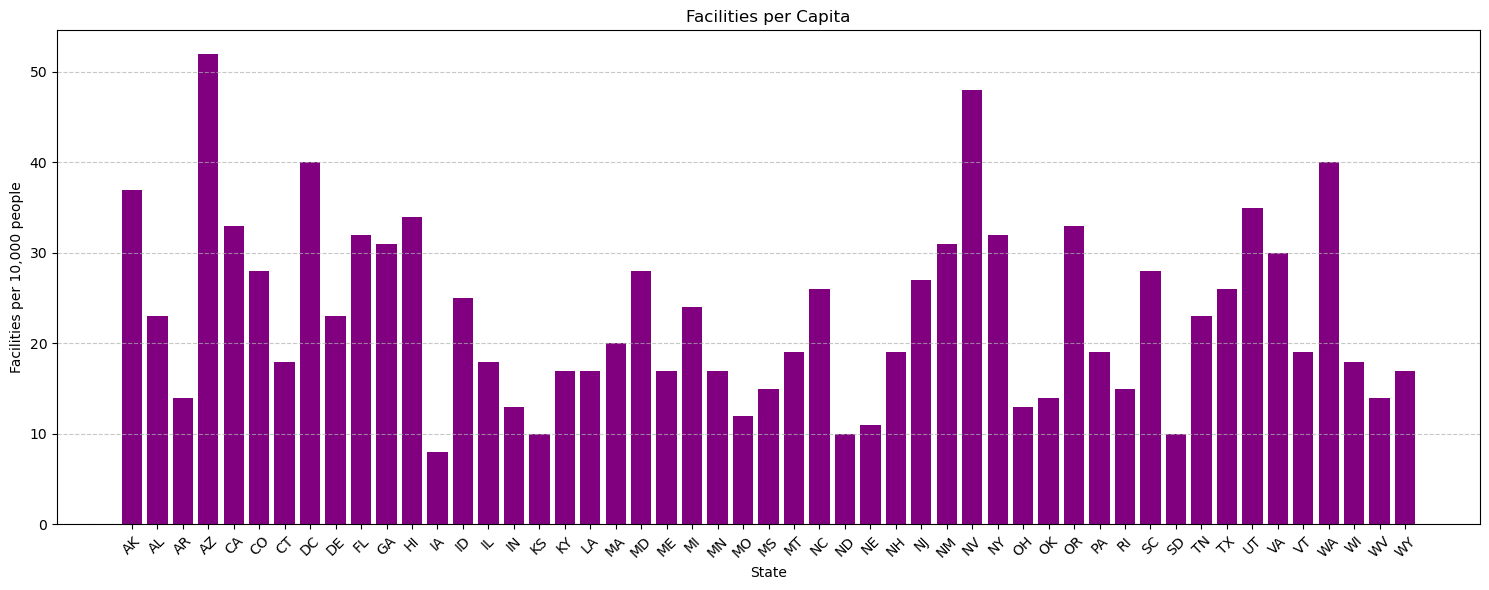

In [140]:
xaxis_state2 = statepopulationDATA_sorted['State']
yaxis_numberper = statepopulationDATA_sorted['Facilities per 10,000 people']


plt.figure(figsize=(15, 6))
plt.bar(xaxis_state2, yaxis_numberper, color='purple', width=0.8)
plt.xlabel('State')
plt.ylabel('Facilities per 10,000 people')
plt.title('Facilities per Capita')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

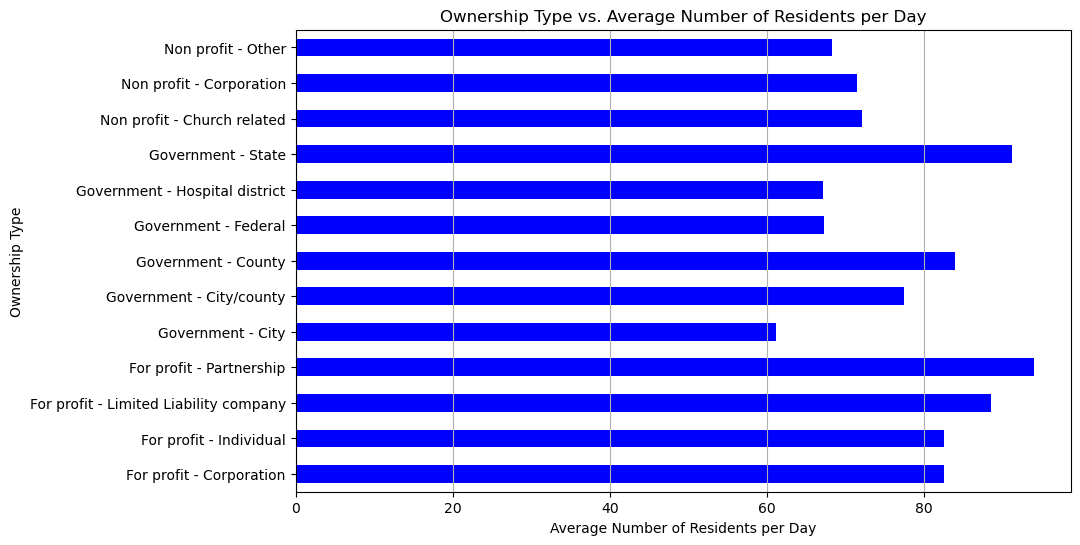

In [143]:
ownership_avg_residents = nursinghomedata.groupby("Ownership Type")["Average Number of Residents per Day"].mean()

plt.figure(figsize=(10, 6))
ownership_avg_residents.plot(kind='barh', color=['blue']) 
plt.title('Ownership Type vs. Average Number of Residents per Day')
plt.ylabel('Ownership Type')
plt.xlabel('Average Number of Residents per Day')
plt.xticks(rotation=0)  
plt.grid(axis='x') 
plt.show()

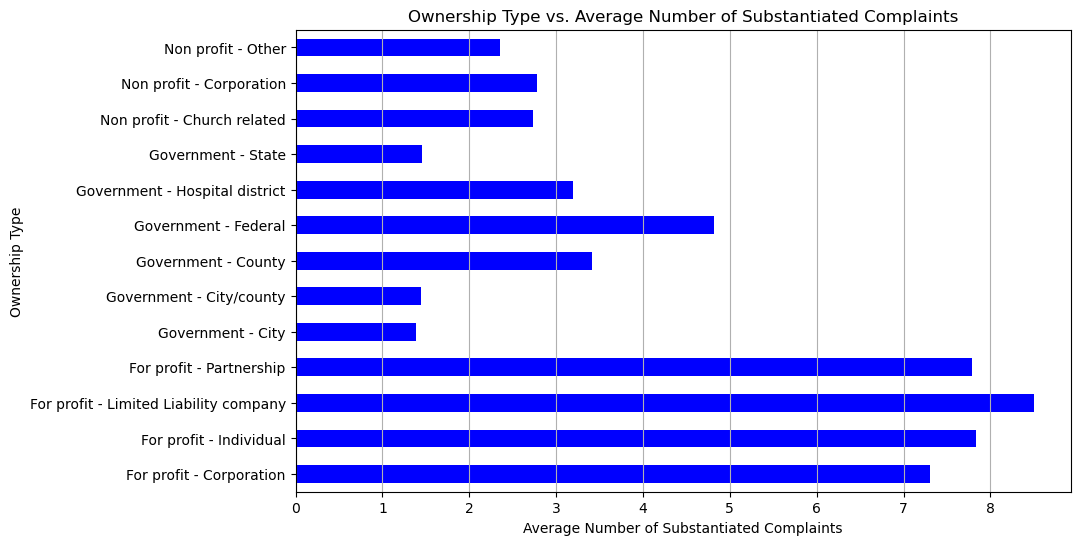

In [146]:
ownership_avg_residents = nursinghomedata.groupby("Ownership Type")["Number of Substantiated Complaints"].mean()


plt.figure(figsize=(10, 6))
ownership_avg_residents.plot(kind='barh', color=['blue']) 
plt.title('Ownership Type vs. Average Number of Substantiated Complaints')
plt.ylabel('Ownership Type')
plt.xlabel('Average Number of Substantiated Complaints')
plt.xticks(rotation=0) 
plt.grid(axis='x')  
plt.show()

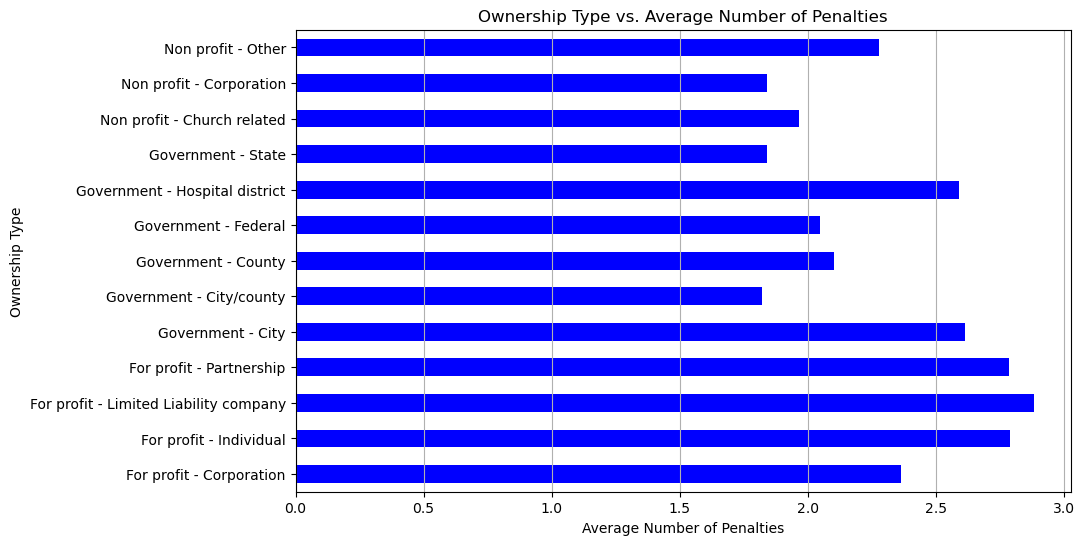

In [141]:
ownership_avg_residents = nursinghomedata.groupby("Ownership Type")["Total Number of Penalties"].mean()


plt.figure(figsize=(10, 6))
ownership_avg_residents.plot(kind='barh', color=['blue'])  
plt.title('Ownership Type vs. Average Number of Penalties')
plt.ylabel('Ownership Type')
plt.xlabel('Average Number of Penalties')
plt.xticks(rotation=0)  
plt.grid(axis='x')  
plt.show()

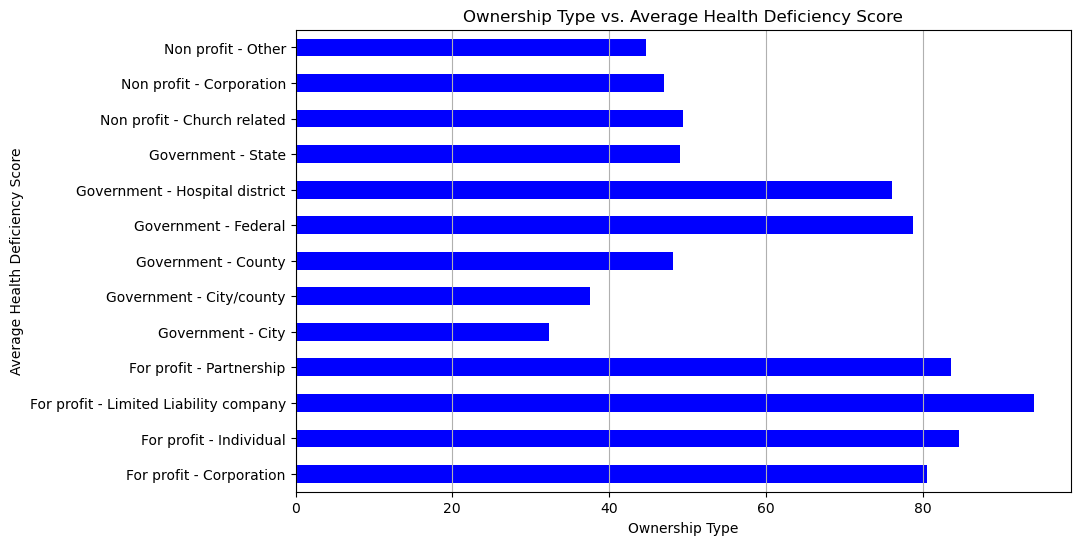

In [128]:
nursinghomedata['Rating Cycle 1 Health Deficiency Score'] = pd.to_numeric(nursinghomedata['Rating Cycle 1 Health Deficiency Score'], errors='coerce')

ownership_avg_penalties = nursinghomedata.groupby("Ownership Type")["Rating Cycle 1 Health Deficiency Score"].mean()

plt.figure(figsize=(10, 6))
ownership_avg_penalties.plot(kind='barh', color=['blue'])  
plt.title('Ownership Type vs. Average Health Deficiency Score')
plt.xlabel('Ownership Type')
plt.ylabel('Average Health Deficiency Score')
plt.xticks(rotation=0)  
plt.grid(axis='x')  
plt.show()

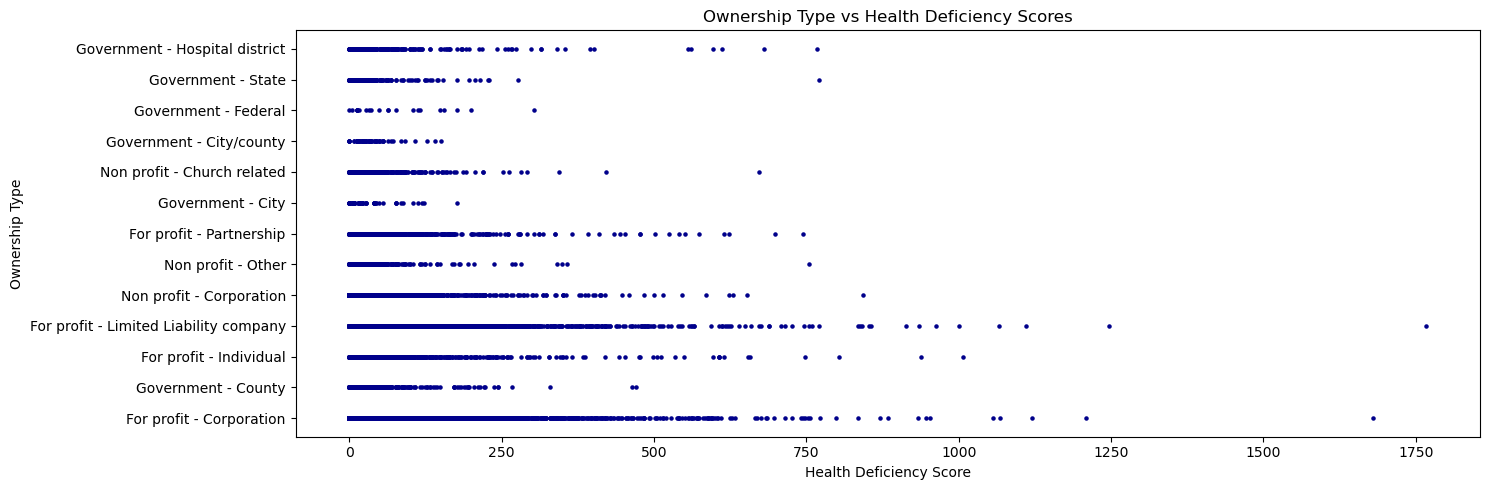

In [139]:
xaxis_state2 = nursinghomedata['Ownership Type']
yaxis_numberper = nursinghomedata['Rating Cycle 1 Health Deficiency Score']

plt.figure(figsize=(15, 5))
plt.scatter(yaxis_numberper, xaxis_state2, s=5, color='darkblue')
plt.xlabel('Health Deficiency Score')
plt.ylabel('Ownership Type')
plt.title('Ownership Type vs Health Deficiency Scores')
plt.xticks(rotation=0)

plt.tight_layout()  
plt.show()

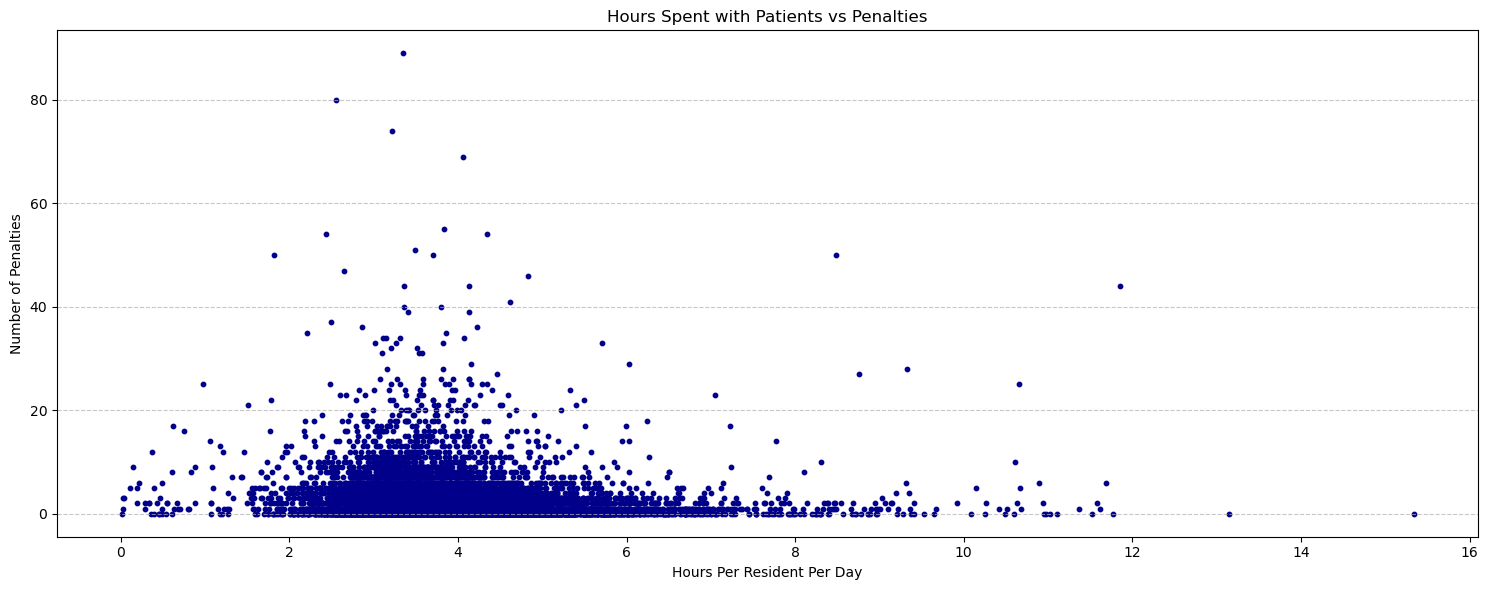

In [101]:
xaxis_state2 = nursinghomedata['Reported Total Nurse Staffing Hours per Resident per Day']
yaxis_numberper = nursinghomedata['Total Number of Penalties']

plt.figure(figsize=(15, 6))
plt.scatter(xaxis_state2, yaxis_numberper, s=10, color='darkblue')
plt.xlabel('Hours Per Resident Per Day')
plt.ylabel('Number of Penalties')
plt.title('Hours Spent with Patients vs Penalties')

plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

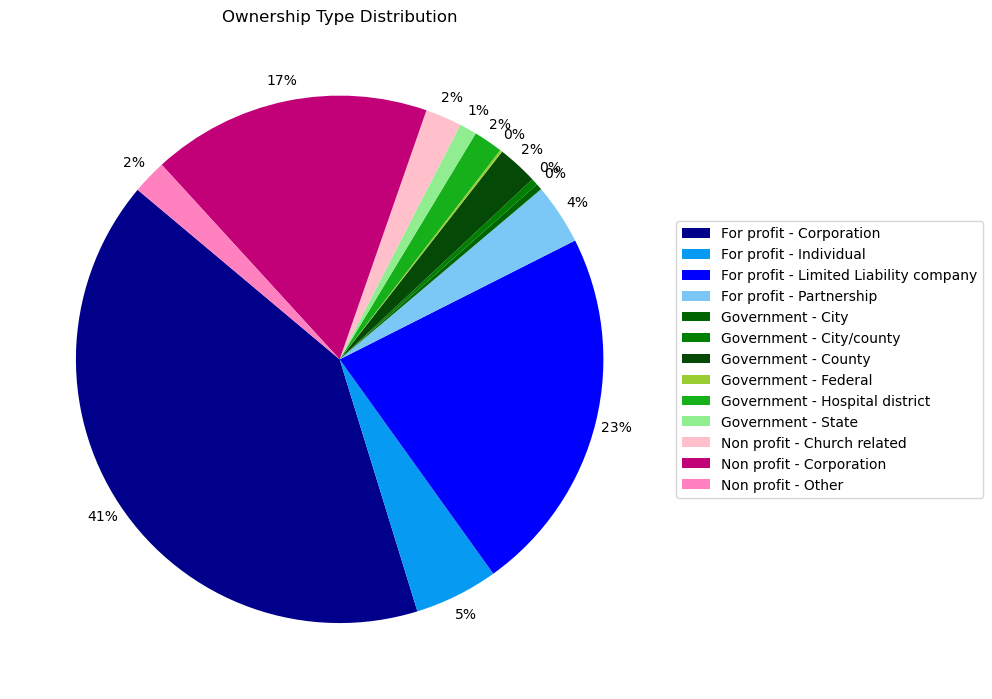

In [271]:
ownership_counts = nursinghomedata['Ownership Type'].value_counts()
ownership_counts_sorted = ownership_counts.sort_values(ascending=False).sort_index()

ownership_colors = ['darkblue', 'xkcd:azure', 'blue', 'xkcd:lightblue', 'darkgreen', 'green', 'xkcd:darkgreen', 'yellowgreen', 'xkcd:green', 'lightgreen', 'pink', 'xkcd:magenta', 'xkcd:pink']

plt.figure(figsize=(10, 10))
pie = plt.pie(ownership_counts_sorted, autopct='%1.f%%', pctdistance=1.08 , startangle=140, colors=ownership_colors)
plt.title('Ownership Type Distribution')

plt.legend(pie[0], ownership_counts_sorted.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [236]:
abuse_icon_n = nursinghomedata[nursinghomedata['Abuse Icon'] == 'N']
abuse_icon_y = nursinghomedata[nursinghomedata['Abuse Icon'] == 'Y']

In [243]:
n_latitudes = abuse_icon_n['Latitude'].tolist()
n_longitudes = abuse_icon_n['Longitude'].tolist()

y_latitudes = abuse_icon_y['Latitude'].tolist()
y_longitudes = abuse_icon_y['Longitude'].tolist()

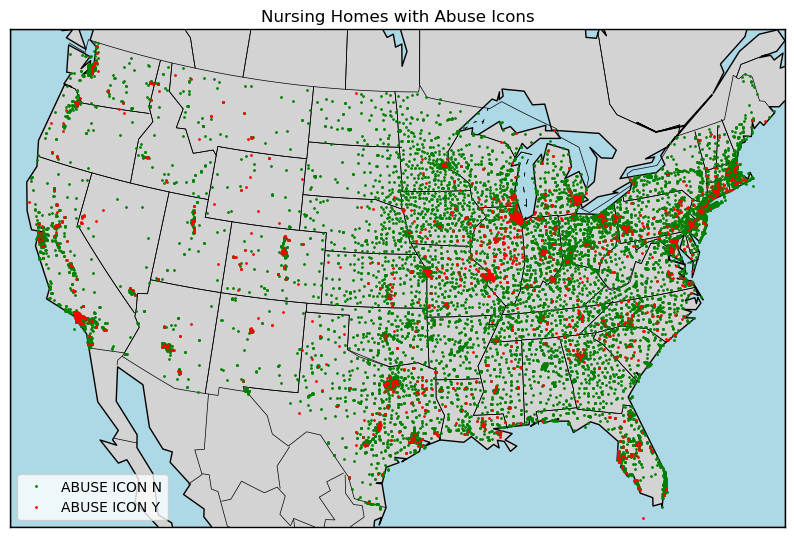

In [272]:
plt.figure(figsize=(10, 10))
map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='lightgray', lake_color='lightblue')
map.drawcoastlines()
map.drawcountries()
map.drawstates()
# map.bluemarble()

# Plot green dots
x_n, y_n = map(n_longitudes, n_latitudes)
map.plot(x_n, y_n, 'go', markersize=1, label='ABUSE ICON N')

# Plot red dots 
x_y, y_y = map(y_longitudes, y_latitudes)
map.plot(x_y, y_y, 'ro', markersize=1, label='ABUSE ICON Y')

plt.title('Nursing Homes with Abuse Icons')
plt.legend()
plt.show()

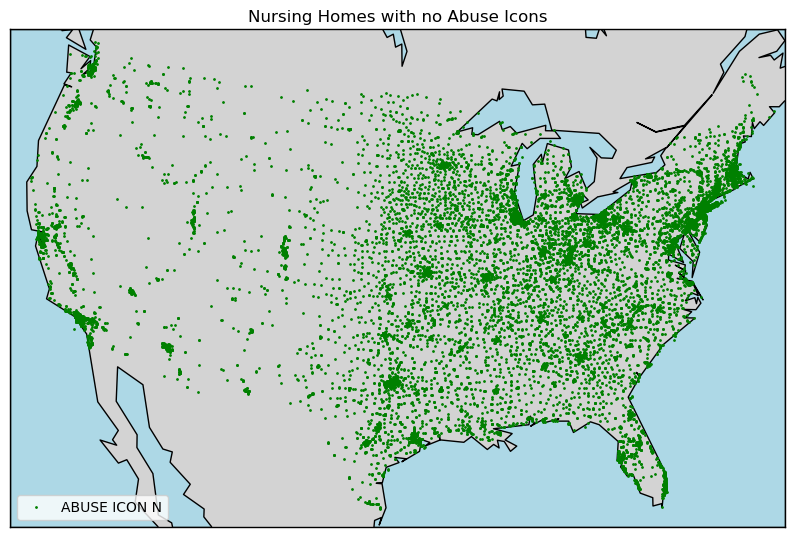

In [251]:
plt.figure(figsize=(10, 10))
map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='lightgray', lake_color='lightblue')
map.drawcoastlines()

# Plot green dots
x_n, y_n = map(n_longitudes, n_latitudes)
map.plot(x_n, y_n, 'go', markersize=1, label='ABUSE ICON N')

plt.title('Nursing Homes with no Abuse Icons')
plt.legend()
plt.show()

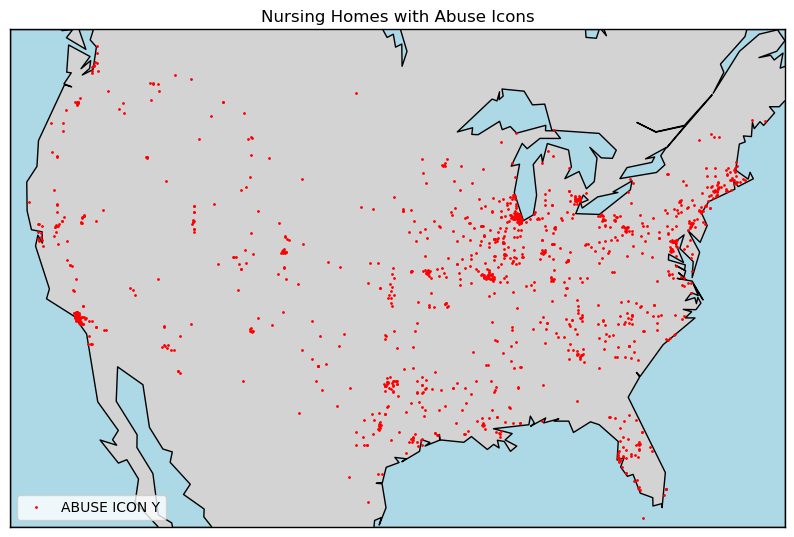

In [254]:
plt.figure(figsize=(10, 10))
map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='lightgray', lake_color='lightblue')
map.drawcoastlines()

# Plot red dots 
x_y, y_y = map(y_longitudes, y_latitudes)
map.plot(x_y, y_y, 'ro', markersize=1, label='ABUSE ICON Y')

plt.title('Nursing Homes with Abuse Icons')
plt.legend()
plt.show()